# Trabajo práctico computacional 2 - Métodos estadísticos en Física Experimental

María Paula Caral

LU: 509/12

In [1]:
from __future__ import division
import random
import numpy as np
import math
import matplotlib.pyplot as plt

# Problema 1: Método Monte Carlo

(1) Generar 10000 números al azar que sigan la distribución de Cauchy a partir de una uniforme [0,1]. 

Usando el ejercicio 5 de la guía 3, sé que la transformación que tengo que hacerle a números al azar entre $-\pi/2$ y $\pi/2$ es $Y=b+a\cdot\tan(X)$.

In [2]:
# Defino la función teórica de Cauchy, porque la voy a usar para comparar los resultados de los histogramas
def Cauchy(a,b,x):
    return (1/np.pi)*(a/(a**2 + (x-b)**2))

In [3]:
# Defino la función que va a transformar al conjunto de números random en una distribución de Cauchy y va a realizar el histograma
def Transformacion(a,b,x,bins):
    y = []
    for i in range (len(x)):
        Y = b + a*math.tan(x[i])
        y.append(Y)
        
    # Histograma de los resultados normalizado
    rango = 10 # Defino el rango en el cual le voy a pedir que tome las cuentas como "válidas" para el histograma. Si no, encuentra valores muy lejos del pico y reparte la cantidad finita de bins con esas cuentas
    entries, edges, _ = plt.hist(y,bins=bins,range=(-rango,rango),density=True,label='Cuentas') 
    
    # Como para poder ponerle un error normalizado correctamente necesito los datos del histograma sin normalizar (es decir, no lo que me devuelve plt.hist() con density = True), le pido esa información a np.histogram
    entries_sin_normalizar = np.histogram(y,bins=bins,range=(-rango,rango))[0]
    
    # Defino los centros de los bins y su ancho para poner los errores. Los bordes de los bins (edges) es indiferente tomarlos del histograma normalizado o sin normalizar.
    bin_centers = 0.5 * (edges[:-1] + edges[1:]) # centro de los bins
    bin_width = edges[1:] - edges[:-1] # ancho de los bins

    # Ahora sí defino el error con su normalizacion. Uso que el error debe ser poissoniano.
    yerr=np.sqrt(entries_sin_normalizar)/(bin_width*sum(entries_sin_normalizar))

    # Los agrego al gráfico
    plt.errorbar(bin_centers, entries, yerr, fmt='r.')

    # Grafico la curva teórica
    r = np.arange(-10,10,0.1) # Escribo un vector donde evaluar la curva teórica
    C = Cauchy(a,b,r) # Evaluo la función en el vector
    plt.plot(r,C,'-',label='Curva Teórica') # Le pido el gráfico de la curva teórica
    plt.axis([-10,10,0,0.4])
    plt.xlabel('valores posibles')
    plt.title('Histograma de cuentas usando la transformación')
    plt.legend(loc='upper left')
    plt.show()
   

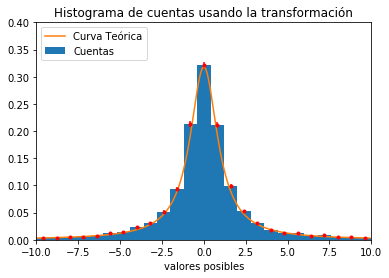

In [4]:
# Obtengo los 10000 numeros uniformes entre -pi/2 y pi/2
N = 10000 # Cantidad total de numeros random que le pido
uniformes = [] # Vector donde voy a guardar todos los valores aleatorios que le pida

for i in range (N):
    x = random.random() # Cada numero random entre 0 y 1 que me tira
    theta = np.pi*(x-1/2) # Pero yo quiero entre -pi/2 y pi/2, entonces hago un cambio de variable
    uniformes.append(theta) # Guardo todos los valores

# Aplico la transformación
Transformacion(1,0,uniformes,25)

Hay correspondencia entre el histograma obtenido y la curva teórica.

(2) Usando método de Monte Carlo. 

Para eso escribo una función con el método de MC a la que le pueda dar el dominio donde quiero que lo haga, la función de distribución f (cualquiera de dos parámetros, por como lo escribí) y la cantidad de números aceptados que quiero, N.

In [5]:
def MonteCarlo(a,b,StepSize,f,c,d,N,bins): # Le doy el dominio [a,b], el paso con el que voy a crear ese vector, la función de distribución f, los parámetros c y d de la distribución (centro y ancho respectivamente, para el caso de la Cauchy), y la cantidad de números que quiero, N. Le agregué bins al final porque era mas facil hacerlo un input que estar cambiandolo a mano.
    lista_de_resultados = [] # Vector donde voy a guardar todos los valores de u que corresponda
    r = np.arange(a,b,StepSize) # Genero el intervalo donde voy a evaluar la f para hallar su máximo
    f_evaluada = f(d,c,r) # Evalúo f en ese intervalo
    fm = max(f_evaluada) # Encuentro el máximo
    while len(lista_de_resultados) < N: # Acá empieza el método de MC, le pido que lo repita mientras la longitud del vector de resultados sea menor de lo que le pido
        y = random.random() 
        z = random.random()
        u = a + (b-a)*y
        v = fm*z
        if v <= f(d,c,u):
            lista_de_resultados.append(u)
            
    # Construyo el histograma de los resultados de MC
            
    cuentas_normalizadas, edges, _ = plt.hist(lista_de_resultados,bins=bins,density=True,label='Cuentas') 
    
    # Como para poder ponerle un error normalizado correctamente necesito los datos del histograma sin normalizar (es decir, no lo que me devuelve plt.hist() con density = True), le pido esa información a np.histogram
    
    cuentas_sin_normalizar = np.histogram(lista_de_resultados,bins=bins)[0] 
    
    # Defino los centros de los bins y su ancho para poner los errores. Los bordes de los bins (edges) es indiferente tomarlos del histograma normalizado o sin normalizar.
    
    bin_centers = 0.5 * (edges[:-1] + edges[1:]) # centro de los bins
    
    bin_width = edges[1:] - edges[:-1] # ancho de los bins
    
    # Ahora sí defino el error con su normalizacion. Uso que el error debe ser poissoniano.
    yerr=np.sqrt(cuentas_sin_normalizar)/(bin_width*sum(cuentas_sin_normalizar))
    
    # Los agrego al gráfico
    plt.errorbar(bin_centers, cuentas_normalizadas, yerr, fmt='r.')

    # Grafico la curva teórica
    plt.plot(r,f_evaluada,label='Curva Teórica') 
    plt.axis([-10,10,0,0.4])
    plt.xlabel('valores posibles')
    plt.title('Histograma de cuentas usando Monte Carlo')
    plt.legend(loc='upper left')
    plt.show()


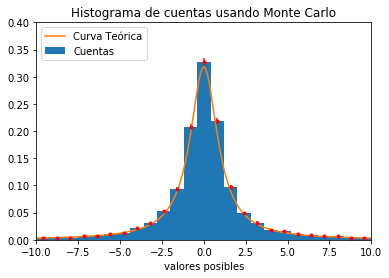

In [6]:
MonteCarlo(-10,10,0.1,Cauchy,0,1,10000,25)

Hay correspondencia entre el histograma obtenido y la curva teórica.

(3) Pros y contras de cada método.

El método de Monte Carlo tiene la ventaja de que no es necesario conocer la transformación que se necesita para llegar a la distribución final deseada, alcanza con saber la forma funcional de esa distribución. Esto no sucede con el primer método.

Por otro lado, por el método de la transformación el histograma se realiza sobre todo el dominio de la función, y se obtienen cuentas para valores muy lejanos del pico de la curva teórica. Por esto, hay que restringir los valores que se toman en cuenta en el histograma o bien usar una cantidad de bines comparable con el número total de datos, para que el  histograma se parezca a la curva teórica. En el caso de Monte Carlo, el histograma se realiza sólo sobre el dominio dado inicialmente, lo cual es una ventaja por lo dicho, pero puede ser una desventaja porque el método es acotado a ese intervalo.

Por último, el método de Monte Carlo funciona solo a partir de una distribución inicial uniforme, mientras que el método de transformación podría hacerse, en principio, para cualquier distribución inicial. Eso lo vuelve un método más versátil.

# Problema 2: Cuadrados mínimos y banda de error

In [7]:
# "Importo" los valores de la tabla
x = np.arange(2.00,3.01,0.1)
y = [2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99]

(1) Encontrar los parámetros de la recta que mejor ajusta los datos.

Para esto uso las ecuaciones de los parámetros que se obtiene por el método de cuadrados mínimos (G5P8).

In [8]:
# Para calcular a1 y a2
N = len(x)
Delta = N*sum(x**2)-(sum(x)**2)
sigma = 0.3

a1 = ((sum(x**2)*sum(y))-sum(x)*sum(x*y))/Delta
a2 = (N*sum(x*y)-sum(x)*sum(y))/Delta

sigma1 = np.sqrt(sum(x**2)*sigma**2/Delta)
sigma2 = np.sqrt(N*sigma**2/Delta)

print('el valor de la ordenada al origen es', "%.3f" % a1, '+/-', "%.3f" % sigma1)
print('el valor de la pendiente es', "%.3f" % a2, '+/-', "%.3f" % sigma2)


el valor de la ordenada al origen es 1.452 +/- 0.721
el valor de la pendiente es 0.799 +/- 0.286


(1) Grafique los datos con su error y la recta obtenida para x entre 0 y 5. 

Para esto creo un vector x_r en el que evaluar la recta que me dan a1 y a2 ya calculados y la grafico.

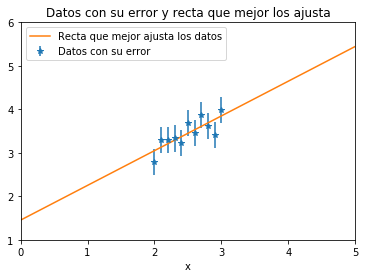

In [9]:
x_r = np.arange(0,6) # Creo el vector donde evaluar
recta = a1+a2*x_r #Evalúo la recta en ese vector
plt.errorbar(x,y,sigma,fmt='*',label='Datos con su error') # Grafico los datos con el error sigma = 0.3 que me dan
plt.plot(x_r,recta,label='Recta que mejor ajusta los datos') # Grafico la recta 
plt.axis([0,5,1,6]) # Pido x entre 0 y 5
plt.title('Datos con su error y recta que mejor los ajusta')
plt.xlabel('x')
plt.legend(loc='upper left');

(2) A partir de la recta prediga el valor esperado y_a para un cierto x_a, con su error. 

Para esto voy a usar que:

Sean $x_i$, $x_j$ variables iniciales e $y_k=y_k(x_i,x_j)$, $y_l=y_l(x_i,x_j)$ variables finales en un cambio de variable, tales que conocemos la covarianza y la esperanza de $x_i$ y $x_j$, entonces vale que

$$E(y_k(x)) = y_k(\mu_x) $$ (idem para $y_l$)

Entonces, en el caso de nuestro problema, siendo $x_i = x$ e $y_k = y$, tengo que el valor esperado $y_a$ de un cierto $x_a$ es simplemente evaluar $x_a$ en la recta $y=a1+a2*x.$

Por otro lado, su error estará dado por la siguiente covarianza

$$Cov(y,y) = \sum_{i,j} \frac{\partial y}{\partial a_i} \frac{\partial y}{\partial a_j} Cov(a_i,a_j)$$

que resulta ser

$$\sigma_a = \sqrt{\sigma_1^2+x_a^2 \sigma_2^2 + 2 x_a Cov(a1,a2)}$$

donde $\sigma_1$ y $\sigma_2$ son los errores ya calculados para $a1$ y $a2$, y $Cov(a1,a2)=-\sum_i x_i \sigma^2 / \Delta$. Para esta última covarianza, los $x_i$ son los valores de $x$ iniciales, los datos; mientras que para $\sigma_a$, los $x_a$ son los valores donde evalúo la recta (vector x_r).

In [10]:
# Calculo el valor de la covarianza de y_a, al cual llamo sigma_a
sigma_a = np.sqrt(sigma1**2 + x_r**2 * sigma2**2- 2*x_r*sum(x)*sigma**2/Delta)
#print(sigma_a)

(2) Grafique $y_a(x_a)$ y agreguelo en forma de banda de error al gráfico anterior.

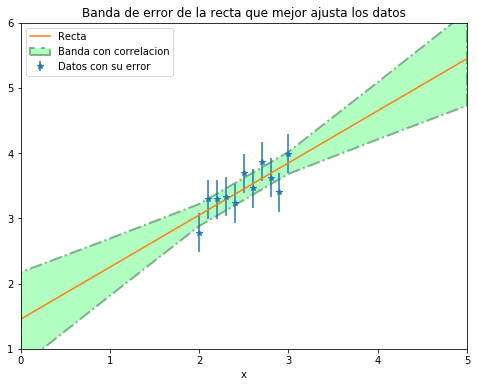

In [11]:
plt.errorbar(x,y,sigma,fmt='*',label='Datos con su error') # Vuelvo a graficar los datos
plt.plot(x_r,recta,label='Recta') # Vuelvo a graficar la recta
plt.axis([0,5,1,6]) # Defino el eje x
plt.fill_between(x_r, recta-sigma_a, recta+sigma_a,
    alpha=0.6, edgecolor='#3F7F4C', facecolor='#7EFF99',
    linewidth=2, linestyle='dashdot',label='Banda con correlacion') # Agrego lo nuevo hallado (sigma_a) como banda de error
plt.xlabel('x')
plt.title('Banda de error de la recta que mejor ajusta los datos')

plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(8,6)

(2) Encuentre qué valor de $x_a$ minimiza el error en $y_a$ e interprete la magnitud de este valor mínimo.

Para esto derivo $\sigma_a$ respecto de $x_a$:

$$\frac{\partial \sigma_a}{\partial x_a} = \frac{1}{2} \frac{2x_a \sigma_2^2 + 2 Cov(a1,a2)}{\sqrt{\sigma_1^2 + x_a^2 \sigma_2^2 + 2 x_a Cov(a1,a2)}}$$

$$\Leftrightarrow 2 x_a \sigma_2^2 = -2 Cov(a1,a2)$$
$$\Leftrightarrow x_a = \frac{-Cov(a1,a2)}{\sigma_2^2}$$

In [12]:
# Calculo x_a que minimiza el error explícitamente
x_min=sum(x)*sigma**2/(Delta*sigma2**2)
print('El valor de x_min es', "%.2f" % x_min)

El valor de x_min es 2.50


El error de los valores que toma la recta aumenta al alejarse de las mediciones porque es a partir de estas que se calcularon sus parámetros, a1 y a2. Es decir, la recta fue armada de forma tal que minimice la distancia vertical entre esta y las mediciones, y el error de los valores que predice la recta son tales que incluirán el 68% de las mediciones dadas. No obstante, estos parámetros (y por ende, los valores que predice la recta con sus errores), no tienen información de los valores $(x,y)$ fuera del rango dado, entonces ahí el error debe ser mayor.

El mínimo error se corresponde con el centro del intervalo $x$ de los datos originales. Esto es coherente con la idea de que al alejarse de los datos el error aumenta, ya que justo en el centro del intervalo es donde está la información más _pesada_ (hay información a izquierda y derecha de ese punto) y por ende donde la recta tiene menor error al ajustar.


(3) Banda de error sin tener en cuenta correlación y por qué es erronea.

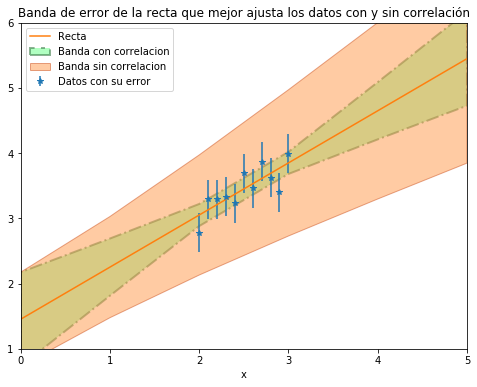

In [13]:
# Calculo sigma_a borrandole el término con la correlacion
sigma_a_sincorrel = np.sqrt(sigma1**2 + x_r**2 * sigma2**2)


plt.errorbar(x,y,sigma,fmt='*',label='Datos con su error') # Vuelvo a graficar los datos
plt.plot(x_r,recta,label='Recta') # Vuelvo a graficar la recta
plt.axis([0,5,1,6]) # Defino el eje x
plt.fill_between(x_r, recta-sigma_a, recta+sigma_a,
    alpha=0.6, edgecolor='#3F7F4C', facecolor='#7EFF99',
    linewidth=2, linestyle='dashdot',label='Banda con correlacion') # Vuelvo a graficar banda de error con correlacion

plt.fill_between(x_r, recta-sigma_a_sincorrel, recta+sigma_a_sincorrel,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848',label='Banda sin correlacion') # Agrego banda de error sin correlacion

plt.xlabel('x')
plt.title('Banda de error de la recta que mejor ajusta los datos con y sin correlación')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(8, 6)



Mientras que la banda de error que tiene en cuenta la correlación cumple la condición de contener solo el 68% de las mediciones, la banda de error sin correlación ignora esto, conteniendo a todas las mediciones. Al no tener en cuenta la correlación se pierde información que tienen a1 y a2 de las mediciones dadas. Por eso, esta última es errónea.

(4) Verifique los resultados analíticos en (2) con la simulación.

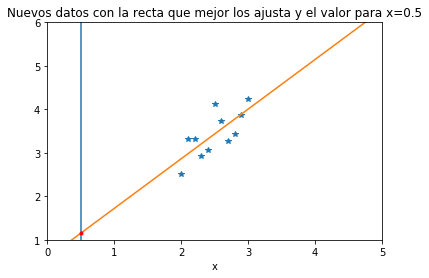

In [14]:
# (a) Para cada x_i genere al azar un y_i de la distribución gaussiana N(mu = a1+a2*x_i,sigma)

Y = []
for i in range (len(y)):
    y_esperado = a1+a2*x[i] # Defino el mu de cada gaussiana
    s = np.random.normal(y_esperado, sigma, 1) # Le pido 1 valor s random del vector, elegido según distribución gaussiana con mu = y_esperado y sigma = el error que me dan para cada y
    Y.append(float(s)) # Voy guardando cada s en un vector Y. Se va a generar uno por cada valor de x en mi vector de datos iniciales
        
plt.plot(x,Y,'*') # Grafico mi nuevo conjunto de datos
plt.axis([0,5,1,6]) # Defino el eje x para que sea como antes

# (b) Ajuste una recta a los (xi, yi) generados, y prediga el valor y_a para x_a = 0.5.

# Calculo la nueva recta y el valor que predice para x_a=0.5        
a1_nuevo = ((sum(x**2)*sum(Y))-sum(x)*sum(x*Y))/Delta # Calculo los nuevos parámetros de la recta
a2_nuevo = (N*sum(x*Y)-sum(x)*sum(Y))/Delta
recta_nuevo = a1_nuevo + a2_nuevo*x_r # Evalúo la recta en un vector x para graficarla
y_a = a1_nuevo + a2_nuevo*0.5 # Calculo el y_a que me interesa (x=0.5)
    
plt.plot(x_r,recta_nuevo) # Grafico la nueva recta que ajusta 
plt.axvline(x=0.5) # Le pido una línea vertical para x=0.5 para que sea más visible cuál es el punto que me piden
plt.plot(0.5,y_a,'r.') # Grafico y_a(x_a=0.5)

plt.xlabel('x')
plt.title('Nuevos datos con la recta que mejor los ajusta y el valor para x=0.5');

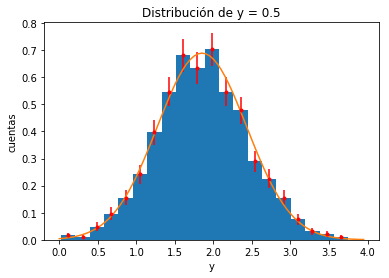

In [15]:
# Repito el procedimiento 1000 veces guardando el valor y_a(x_a=0.5) para realizar un histograma

Y_a = [] # Vector donde voy a guardar cada resultado y_a

for j in range (1000):
    Y = []
    for i in range (len(y)):
        y_esperado = a1+a2*x[i]
        s = np.random.normal(y_esperado, sigma, 1)
        Y.append(float(s))
        
    a1_nuevo = ((sum(x**2)*sum(Y))-sum(x)*sum(x*Y))/Delta
    a2_nuevo = (N*sum(x*Y)-sum(x)*sum(Y))/Delta
    y_a = a1_nuevo + a2_nuevo*0.5
    Y_a.append(y_a)
    
# Construyo el histograma
    
cuentas_normalizadas, edges, _ = plt.hist(Y_a,bins=20,density=True,label='Cuentas') 
    
# Para los errores hago lo mismo que antes
    
cuentas_sin_normalizar = np.histogram(Y_a,bins=20)[0] 
 
bin_centers = 0.5 * (edges[:-1] + edges[1:]) 
    
bin_width = edges[1:] - edges[:-1] 
    
yerr=np.sqrt(cuentas_sin_normalizar)/(bin_width*sum(cuentas_sin_normalizar))
    
plt.errorbar(bin_centers, cuentas_normalizadas, yerr, fmt='r.')
   

# Dibuje sobre este la gaussiana con el valor esperado y el error de y_a calculado teoricamente en 2.

# El valor esperado de y_a es
recta_05 = a1+a2*0.5 
# El valor del sigma_a para ese valor es
sigma_a_05 = np.sqrt(sigma1**2 + 0.5**2 * sigma2**2- 2*0.5*sum(x)*sigma**2/Delta)


def Gaussiana(k,mu,sigma): # Defino la Gaussiana para poder plotearla sobre el histograma
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp((-1/2)*(k-mu)**2/sigma**2)

V = np.arange(0,4,0.05) # Defino el vector sobre el cual evaluar la gaussiana
G = Gaussiana(V,recta_05,sigma_a_05) # Evalúo la gaussiana

plt.plot(V,G,'-') # Grafico la curva teórica

plt.xlabel('y')
plt.ylabel('cuentas')
plt.title('Distribución de y = 0.5');

Al ver que los valores y_a(x_a=0.5) obtenidos al usar las rectas que mejor ajustan los conjuntos de datos equivalentes al inicial siguen una distribución gaussiana con [esperanza = el valor y_a de la recta correspondiente a los datos dados por el enunciado], y [sigma = sigma de y_a correspondiente a los datos dados por el enunciado], entonces lo que estoy probando es que en efecto la banda de error calculada para la recta de los datos iniciales estima bien el error para los valores de la recta. El 68% de las veces las mediciones caerán dentro del intervalo [valor de y_a en recta - sigma_a , valor de y_a en recta + sigma_a ], es decir, $\textbf{dentro de la banda de error que obtuve en (2).}$